# Ungraded Lab: Birthday Problems

Welcome! During this lab you will reinforce the notion of how counter-intuitive probabilities can be by taking a look at the famous birthday problem. In fact you will take a look at 4 variations of this problem. You can use one you have already seen the solution for, to try and come up with the solution for the next one, the results might surprise you!

Let's get started!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils

%matplotlib widget

## Introduction to the problem

All of these problems share a similar setting. You have a classroom full of students (the number may vary) and want to know the probabilities of two students having the same birthday or of any student having a particular birthday, anything along those lines. As mentioned before, you will see 4 variations of the problem.

You can think of these problems in two ways:
   - What is the minimum number of students `n` that need to be in the classroom to have a matching birthday with a given probability?
   - Given `n` what is the probability of having a match?
    
Both ways model the situation from different angles but they are essentially covering the same.

## Play the game of matching your birthday

To further motivate this situation a game is presented. You can use the following cell to run an interactive game, it is very simple to use: you need to select your birthday (the year does not matter) in the dropdown widget and then you can click the `Simulate!` button to randomly create students until one of them has the same birthday as you. The left plot shows you the history of the result for each simulation and the right plot shows you the same information in a histogram so you can see how this variable distributes.

You can try this for as long as you want so you get a sense of the probability distribution for this process (it is recommended to try it for at least 30 runs):

DatePicker(value=None, description='Pick your bday', step=1, style=DescriptionStyle(description_width='initial…

Button(description='Simulate!', style=ButtonStyle())

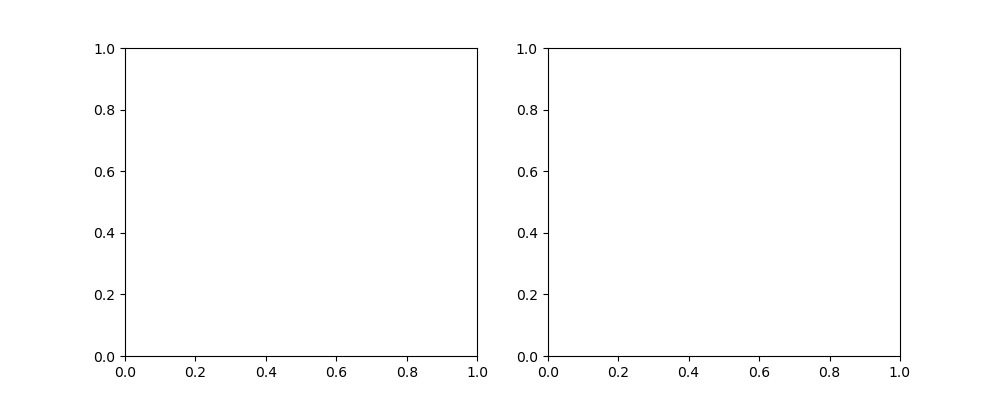

In [2]:
game = utils.your_bday()

## First Problem

The first problem tries to answer the question: given a pre-defined date, what is the value of `n` such that the probability of having a match is greater than or equal to 0.5?

<img src="./images/first.png" style="height: 200px;"/>

Before taking a look at the analytical solution you will try to solve it by creating simulations with Python. For this purpose you can use the `simulate` helper function provided in the next cell. Run it to load this function which will be used shortly:

In [3]:
def simulate(problem_func, n_students=365, n_simulations=1000):
    
    # Initialize the counter of matches at 0
    matches = 0
    
    # Run the simulation for the desired number of times
    for _ in range(n_simulations):
        
        # If there is a match in the classroom add 1 to the counter of matches
        if problem_func(n_students):
            matches += 1
    
    # Return the ratio of number of matches / number of simulations
    return matches/n_simulations

This function returns the simulated probability for a given problem when you pass to it the number of students and the number of simulations and it has these two properties:

   - The higher the number of students the higher the probability of a match.
   - The higher the number of simulations the more accurate the simulated probability will be (This fact will be discussed further in Week 3. This is known as the Central Limit Theorem). 

This is pretty cool but how do you use this helper function? You need to pass another function to it that models the situation at hand. This other function should have two criteria so that `simulate` works as expected:

   - It should receive the number of students as input.
   - It should return True if there was a match or False otherwise.
    
You can create a function that models problem number 1 by running the following cell:

In [6]:
def problem_1(n_students):
    
    # Predefine a specific birthday
    predef_bday = np.random.randint(0, 365)
    
    # Generate birthdays for every student
    gen_bdays = np.random.randint(0, 365, (n_students))
    
    # Check if predefined bday is among students
    return predef_bday in gen_bdays

Now you can use these two functions in conjuction to get the probability of a match for a given classroom size. Notice that you can tweak the value of the `n` variable to simulate classrooms with different number of students. Also notice that this time the simulation is run 10,000 times instead of the default 1000. This gives you a more accurate simulated probability at the expense of taking longer to execute:

In [7]:
n = 100 # try changing this value!
simulated_prob = simulate(problem_1, n_students=n, n_simulations=10_000)

print(f"The simulated probability of any student to have a bday equal to a predefined value is {simulated_prob} in a classroom with {n} students")

The simulated probability of any student to have a bday equal to a predefined value is 0.2456 in a classroom with 100 students


This is very cool but it still has one major drawback: you would need to try a bunch of values for `n` before arriving at the solution. Instead of taking this approach you can generate a plot that shows the simulated probability as a function of the number of students in the classroom:

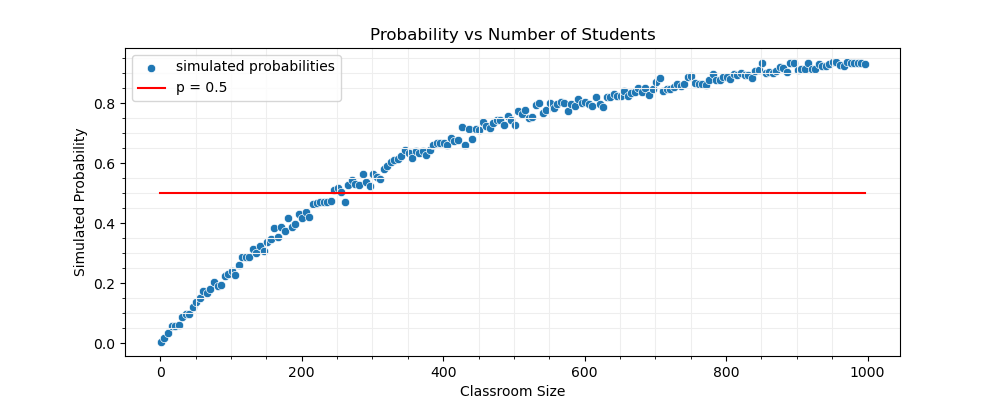

In [8]:
# Generate the simulated probability for every classroom
simulated_probs_1 = [simulate(problem_1, n_students=n) for n in utils.big_classroom_sizes]

# Create a scatterplot of simulated probabilities vs classroom size
utils.plot_simulated_probs(simulated_probs_1, utils.big_classroom_sizes)

Remember that this approach is a simulation and thus you are generating simulated (or approximated) probabilities. Because of this the curve is not completely smooth and you will get slightly different values every time you run the simulation.

## Analytical Solution

Now that you have built a stronger intuition, let's calculate explicitily the probability $P$ that at least one student in the room has the birthday the same as the pre-defined date. It is clear that $P = P(n)$, i.e., the value for $P$ depends on the number of students in the room and, as $n$ become large, $P(n)$ must become closer to $1$. With a formula for $P(n)$ we can then find the minimum $n$ such that $P(n) \geq 0.5$. Let's suppose that a year has $365$ days.

Let's consider $D$ the pre-defined birthday and suppose a student is selected at random. 

Defining the event $S_i$ as the $i$-th student has birthday in the day $D$. Then $P(S_i) = \frac{1}{365}$, because there are $365$ equally likely possibilities for their birthday. So, using the **complement rule**, the probability that this student's birthday isn't day $D$ is $P(S_i^c) = 1 - P(S_i) = 1 - \frac{1}{365}$. 

Note that this probability is the same for any student and we can fairily assume that each student's birthday is independent from each other. Consider the event $\mathcal{S}$ the desired event, i.e., at least one student has birthday in day $D$. Note that:

$\mathcal{S}^c$ is the probability that **no student has birthday in day $D$** and this is the same as:

- Student $1$ has birthday in a day different than D, AND
- Student $2$ has birthday in a day different than D, AND,
...
- Student $k$ has birthday in a day different than D.

With our definitions, this is just $S_1^c \cap S_2^c \cap \ldots \cap S_k^c.$ Therefore

$
\begin{equation}
\begin{split}
P(\mathcal{S}) {} & = 1 - P(\mathcal{S}^c) \\
              & = 1 - P(S_1^c \cap S_2^c \cap \ldots \cap S_k^c) \\
              & = 1 - P(S_1^c)P(S_2^c) \cdots P(S_k^c) \text{ (independence)}\\
              & = 1 - (1 - \frac{1}{365})^n.
\end{split}
\end{equation}
$

As you've expected, $P(\mathcal{S}) = 1 - (1 - \frac{1}{365})^n = P(n)$. Now, you are ready to answer the question: for wich value of $n$, $P(n) \geq \frac{1}{2}$?

Well, $P(n) \geq \frac{1}{2}$ is equivalent to

\begin{align}
 1 - \left(1 - \frac{1}{365}\right)^n &\geq \frac{1}{2} \textit{, passing 1 to the other side and inverting the inequality sign}\\
\left(1 - \frac{1}{365}\right)^n &\leq \frac{1}{2}\\
\left(\frac{364}{365}\right)^n &\leq 2^{-1} \\
\ln{\left(\frac{364}{365}\right)}^n &\leq \ln{2^{-1}} \\
n \ln{\left(\frac{364}{365}\right)} &\leq -\ln{2}\\
\end{align}

Now, using a calculator we can easily find that $\ln{2} \approx 0.693$ and $\ln{\frac{364}{365}} \approx -0.003$, the last inequality becomes

$$n \cdot -0.003 \leq -0.693,$$

which is equivalent to $n \geq \frac{0.693}{0.003} = 253$. 

## Second Problem

The second problem is very similar to the first one, with the difference that the predefined value is not previously defined but it is drawn from one of the students at random so it can be worded like this: given a classroom with `n` students, if you draw any student at random what is the value of `n` such that the probability of having a match with another student is greater than or equal to 0.5?

<img src="./images/second.png" style="height: 200px;"/>

You can reuse the `simulate` helper function defined earlier so the only thing left is to code the function that models this particular problem. **But before doing this try to come up with a hypothesis about the result. What do you think will happen? Will `n` be similar to the previous one or do you need a higher value? What about a smaller value?**

Run the next cells to find out!

In [9]:
def problem_2(n_students):
    
    # Generate birthdays for every student
    gen_bdays = np.random.randint(0, 365, (n_students))
    
    # Pick one student at random
    rnd_index = np.random.randint(0, len(gen_bdays))
    
    # Get the bday from the selected student
    rnd_bday = gen_bdays[rnd_index]
    
    # Take the bday out of the pool of bdays (otherwise there is always a match)
    remaining_bdays = np.delete(gen_bdays, rnd_index, axis=0)
    
    # Check if another student shares the same bday
    return rnd_bday in remaining_bdays

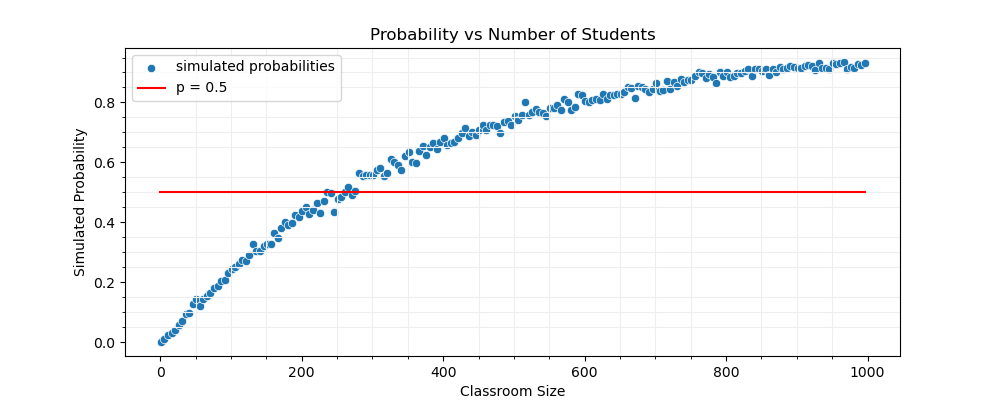

In [10]:
# Generate the simulated probability for every classroom
simulated_probs_2 = [simulate(problem_2, n_students=n) for n in utils.big_classroom_sizes]

# Create a scatterplot of simulated probabilities vs classroom size
utils.plot_simulated_probs(simulated_probs_2, utils.big_classroom_sizes)

## Analytical Solution

Note that this problem is very similar to the first one. The difference is that, instead of selecting one day $D$ at random from the room, you select a student and fix their birthday $D$. You can reduce this problem to the previous one by removing this student from the room and considering now a room with $n-1$ students. The problem now is analogous to the previous one but you will end up with a  $n-1$ instead of $n$. Therefore, it is easy to see that, in this case,

$$P(n) = 1 - \left(1 - \frac{1}{365} \right)^{n-1}.$$

With some calculations you get that $P(n) \geq \frac{1}{2}$ if and only if $n \geq {\frac{0.693}{0.003}} + 1 = 254$.

## Third Problem

The third one is the most famous of all the birthday problems and it was covered in the lectures in a sligthly different way.

This time you don't want to find a match with a predefined value but rather to find a match between any two birthdays, it can be worded like this: given a classroom with students, what is the value of `n` such that the probability of having a match is greater than or equal to 0.5 for any two students?

<img src="./images/third.png" style="height: 200px;"/>

Note that, in the lectures, it was calculated the probability that **no students share a birthday**. Here, you are dealing with the case that, **at least two students share a birthday**, which is the *complement* of the question discussed in the lecture.

Before doing the simulation as with previous problems ask yourself: **Do you think that the value of `n` will be similar to that of the previous problems? If you have to guess would you say it needs to be greater than or lower?**

To help you out run the next cell to play an interactive version of this problem. The instructions are simple:

   - To start a new simulation click anywhere on the upper panel (just below where the `Figure` headline appears)
   - The upper panel shows randomly generated birthdays and let's you know when there is a match between two students
   - The bottom left panel keeps track of the number of students required to have a match for every run
   - The bottom right panel shows that same information as a histogram
   - **Try running the simulation at least 30 times to get a sense of how this particular problem behaves**

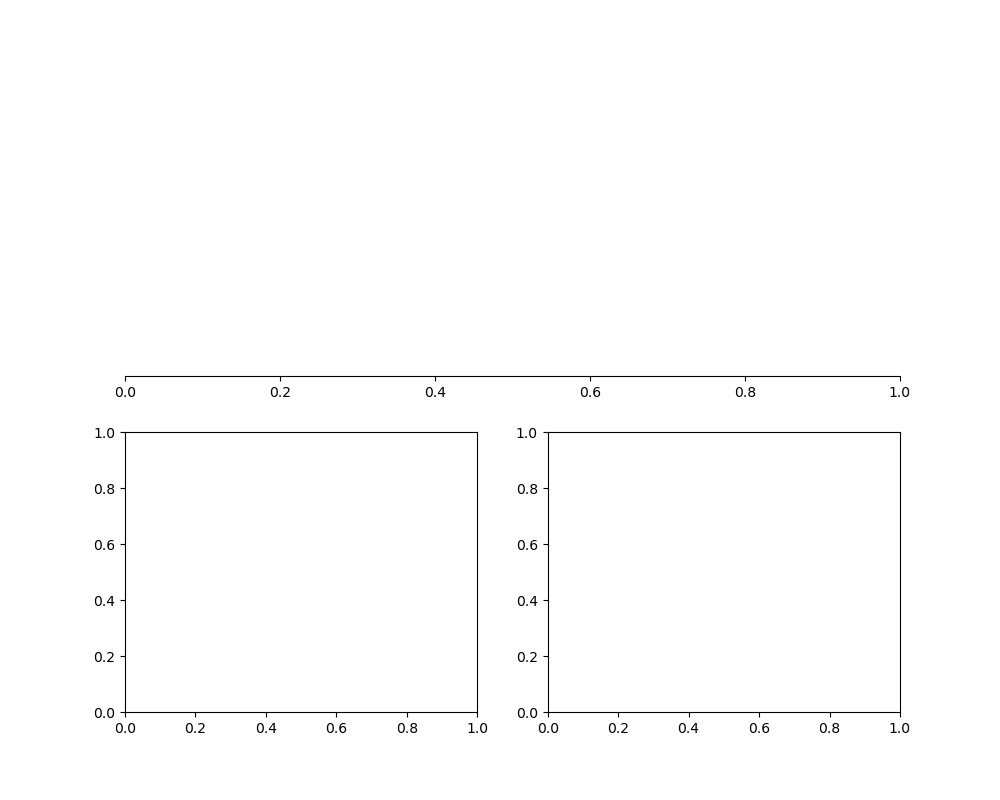

In [11]:
game_third_prob = utils.third_bday_problem()

Now you should have a hypothesis of the number of students in the classroom needed for the match. Test your intuition by generating the simulated probabilities as before:

In [12]:
def problem_3(n_students):
    
    # Generate birthdays for every student
    gen_bdays = np.random.randint(0, 365, (n_students))
    
    # Get array containing unique bdays
    unique_bdays = np.array(list(set(gen_bdays)))
    
    # Check that both the original and unique arrays have the same length 
    # (if so then no two students share the same bday)
    return len(unique_bdays) != len(gen_bdays)

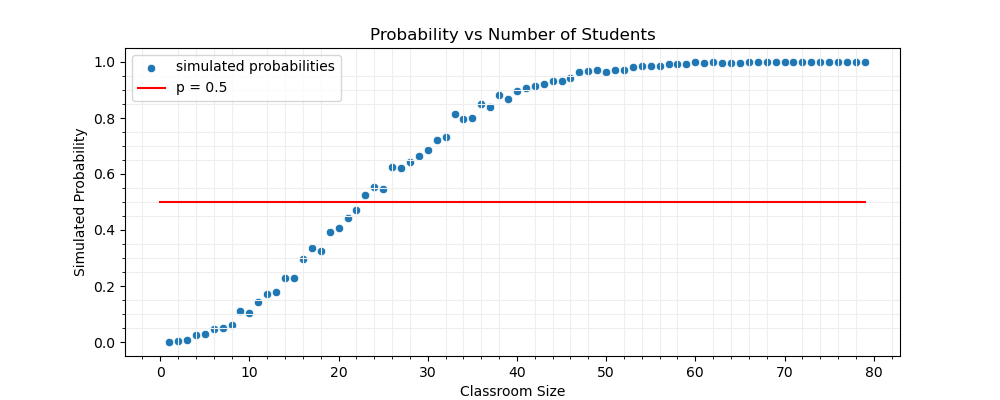

In [13]:
# Generate the simulated probability for every classroom
simulated_probs_3 = [simulate(problem_3, n_students=n) for n in utils.small_classroom_sizes]

# Create a scatterplot of simulated probabilities vs classroom size
utils.plot_simulated_probs(simulated_probs_3, utils.small_classroom_sizes)

## Analytical solution

This problem is a bit different from the previous two, so you will need to make some calculations again. Now, the idea is to perform the calculation by steps, selecting one student at time. So let's define $Q_i$ as the probability that the $i$-th student has birthday different from the previous students. Note that $Q_1 = 1$, because there is no previous student. Note also that,

$$Q_2 = \frac{364}{365}.$$

This is because, given that you've selected one student, the second has $364$ possible values, it has a chance of $\frac{364}{365}$ of not matching birthdays with the first. Now, for $Q_3$, there are $2$ selected students with different birthdays, so the probability that the third student not matches any of the previous two is:

$$Q_3 = \frac{363}{365}.$$

Inductively, if we select $n$ students, then $$Q_n = \frac{365 - (n-1)}{365}.$$

Since we assume that we are choosing students independently from each other, then the probability of picking $n$ students that **don't have their birthday in common** is just the product of all $Q_n$. Let's call it $Q$, so:

$$Q = Q_1 \cdot Q_2 \cdot \ldots \cdot Q_{n-1} \cdot Q_n = 1 \cdot \frac{364}{365} \cdot \frac{363}{365} \cdot \ldots \cdot \frac{365 - (n-2)}{365} \cdot \frac{365 - (n-1)}{365}.$$

The desired probability is, therefore, $P:= 1 - Q$, since we want the probability of **at least two students match their birthday** (this is just the complement rule).

Note that we could just write a small program in Python to compute this value for every $n$ and return the first value that achieves the inequality we want ($P \geq \frac{1}{2}$), but for sake of completion we will provide an analytic solution.

We will use the following approximation: $1 - x \approx e^{-x}$ for $x$ small and positive. We can re-write $Q$ as

$$Q = 1 \cdot \frac{364}{365} \cdot \frac{363}{365} \cdot \ldots \cdot \frac{365 - (n-2)}{365} \cdot \frac{365 - (n-1)}{365} 
    = \left(1 - \frac{1}{365} \right) \cdot \left(1 - \frac{2}{365} \right) \cdot \ldots \cdot \left(1 - \frac{n-2}{365} \right) \cdot \left(1 - \frac{n-1}{365} \right).$$

Thus, using the approximation:

$$Q \approx e^{-\frac{1}{365}} \cdot e^{-\frac{2}{365}} \cdot \ldots \cdot e^{-\frac{n-2}{365}} \cdot e^{-\frac{n-1}{365}} = e^{- \frac{1 + 2 + \ldots + (n-1)}{365}}.$$

Using the formula $1 + 2 + \ldots + (n-1) = \frac{n(n-1)}{2}$ (this is the sum of the first $n-1$ terms of a arithmetic progression with first term $1$ and common difference $1$), we have:

$$Q \approx e^{-\frac{n(n-1)}{730}}.$$

So, $P = 1 - Q = 1 - e^{-\frac{n(n-1)}{730}}$ and $P \geq \frac{1}{2}$ is equivalent to $1 - e^{-\frac{n(n-1)}{730}} \geq \frac{1}{2}$ which is equivalent to $\frac{n(n-1)}{730} \geq \ln 2$, i.e., $n(n-1) \geq 730 \cdot \ln 2$. Since $\ln 2 \approx 0.6931$, so $$n(n-1) \geq 505.96 \geq 505.$$

Solving the quadratic equation $n(n-1) = 505$, the only positive value for $n$ is $n = \frac{1 + \sqrt{2021}}{2} \approx 23.$

Therefore, if $n\geq23$ then $P \geq \frac{1}{2}$.

## Fourth Problem

The fourth and final one is similar to the third problem but with the difference that you have two classrooms and want to find a match between a student in one classroom and a student in the other, presenting it like a question it will be: given two classrooms with `n` students, what is the value of `n` such that the probability of having a match is greater than or equal to 0.5 for any two students in each classroom?

<img src="./images/fourth.png" style="height: 200px;"/>

**Once again try to come up with your own hypothesis before doing the simulation!**

In [14]:
def problem_4(n_students):
    
    # Generate birthdays for every student in classroom 1
    gen_bdays_1 = np.random.randint(0, 365, (n_students))
    
    # Generate birthdays for every student in classroom 2
    gen_bdays_2 = np.random.randint(0, 365, (n_students))
    
    # Check for any match between both classrooms
    return np.isin(gen_bdays_1, gen_bdays_2).any()

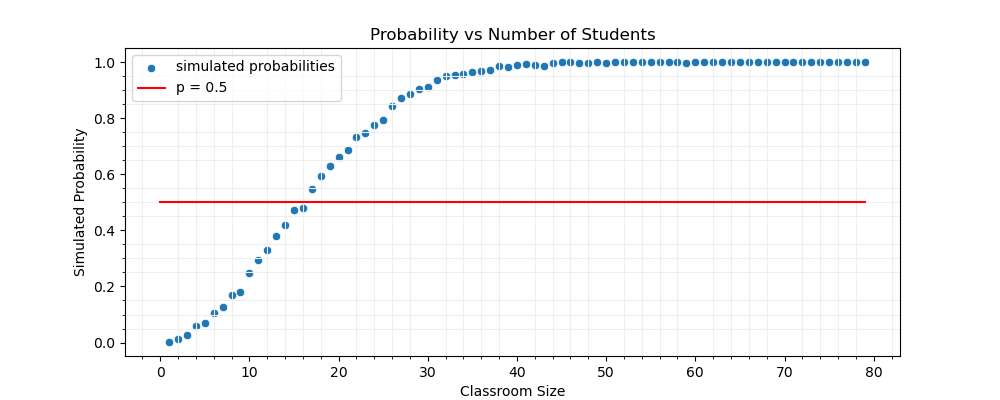

In [15]:
# Generate the simulated probability for every classroom
simulated_probs_4 = [simulate(problem_4, n_students=n) for n in utils.small_classroom_sizes]

# Create a scatterplot of simulated probabilities vs classroom size
utils.plot_simulated_probs(simulated_probs_4, utils.small_classroom_sizes)

## Analytical solution

The solution to this problem is similar to the first one. Now, instead of only **one** date, there are $n$ dates to compare. 
Remember that if we have only one date $D$ to compare than the probability, let's say $Q_1$ of having **no** student with birthday $D$ is $Q_1 = (1 - \frac{1}{365})^n$ (the complement of $P(\mathcal{S})$ in that case). Now we proceed as problem three, by having independent samples of students. For each student sampled, the probability $Q_i$ is $(1 - \frac{1}{365})^n$, so the probability of no student matches any of the $n$ given dates is therefore

$$Q = Q_1 \cdot Q_2 \cdot \ldots \cdot Q_{n-1} \cdot Q_n = (1 - \frac{1}{365})^{n^2}$$

Using the approximation $1 - x \approx e^{-x}$ for $x$ small,

$$Q \approx e^{-\frac{n^2}{365}}$$

Therefore, $$P(n) \approx 1 - e^{-\frac{n^2}{365}}.$$ 

Thus, $P(n) \geq \frac{1}{2}$ if $n \geq \sqrt{\ln 2 \cdot 365} \approx 15.9 \geq 15$

**Congratulations! You have finished the ungraded lab on the Birthday problems!**